In [1]:
# Gregory Way 2018
# Multiple Myeloma Classifier
# 3.visualize_coefficients.ipynb
#
# Observes differences in coefficients across the multiclass classifier classes
#
# Usage: Run in command line
#
#     Rscript --vanilla visualize_coefficients.R
#
# Output:
# Descriptive Coefficient Plot

In [2]:
library(dplyr)
library(ggplot2)
library(ggrepel)

Warning message:
“package ‘dplyr’ was built under R version 3.4.3”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message:
“package ‘ggplot2’ was built under R version 3.4.3”Warning message:
“package ‘ggrepel’ was built under R version 3.4.3”

In [3]:
# Load ENSEMBL to Symbol dictionary
gene_file <- file.path('data', 'raw', 'gprofiler_results_1002952837509.xlsx')
gene_dict_df <- readxl::read_excel(gene_file, col_names = FALSE)
colnames(gene_dict_df) <- c('num', 'GENE_ID', 'co', 'SYMBOL', 'ALT', 'a', 'b')
gene_dict_df <- gene_dict_df[!duplicated(gene_dict_df$GENE_ID), ]
head(gene_dict_df)

num,GENE_ID,co,SYMBOL,ALT,a,b
1,ENSG00000000003,1.1,TSPAN6,TSPAN6,tetraspanin 6 [Source:HGNC Symbol;Acc:HGNC:11858],"ARRAYEXPRESS, ENSG"
2,ENSG00000000005,2.1,TNMD,TNMD,tenomodulin [Source:HGNC Symbol;Acc:HGNC:17757],"ARRAYEXPRESS, ENSG"
3,ENSG00000000419,3.1,DPM1,DPM1,"dolichyl-phosphate mannosyltransferase subunit 1, catalytic [Source:HGNC Symbol;Acc:HGNC:3005]","ARRAYEXPRESS, ENSG"
4,ENSG00000000457,4.1,SCYL3,SCYL3,SCY1 like pseudokinase 3 [Source:HGNC Symbol;Acc:HGNC:19285],"ENSG, ARRAYEXPRESS"
5,ENSG00000000460,5.1,C1ORF112,C1ORF112,chromosome 1 open reading frame 112 [Source:HGNC Symbol;Acc:HGNC:25565],"ARRAYEXPRESS, ENSG"
6,ENSG00000000938,6.1,FGR,FGR,"FGR proto-oncogene, Src family tyrosine kinase [Source:HGNC Symbol;Acc:HGNC:3697]","ENSG, ARRAYEXPRESS"


In [4]:
# Load Classifier Coefficients
coef_file <- file.path('results', 'classifier', 'classifier_coefficients.tsv')
coef_df <- readr::read_tsv(coef_file) %>%
  dplyr::left_join(gene_dict_df, by = 'GENE_ID')
head(coef_df)

Parsed with column specification:
cols(
  GENE_ID = col_character(),
  wildtype = col_double(),
  KRAS = col_double(),
  NRAS = col_double()
)


GENE_ID,wildtype,KRAS,NRAS,num,co,SYMBOL,ALT,a,b
ENSG00000244405,-1.25074291,1.0092025,0.3876048,40217,40217.1,ETV5,ETV5,ETS variant 5 [Source:HGNC Symbol;Acc:HGNC:3494],"ARRAYEXPRESS, ENSG"
ENSG00000153064,-0.53002518,0.8806176,0.0000000,9726,9726.1,BANK1,BANK1,B-cell scaffold protein with ankyrin repeats 1 [Source:HGNC Symbol;Acc:HGNC:18233],"ARRAYEXPRESS, ENSG"
ENSG00000131187,-0.79863799,0.6108468,0.2938256,6476,6476.1,F12,F12,coagulation factor XII [Source:HGNC Symbol;Acc:HGNC:3530],"ARRAYEXPRESS, ENSG"
ENSG00000184445,-0.18836871,0.4978895,0.0000000,16035,16035.1,KNTC1,KNTC1,kinetochore associated 1 [Source:HGNC Symbol;Acc:HGNC:17255],"ARRAYEXPRESS, ENSG"
ENSG00000143878,-0.09074332,0.4774349,0.0000000,8573,8573.1,RHOB,RHOB,ras homolog family member B [Source:HGNC Symbol;Acc:HGNC:668],"ENSG, ARRAYEXPRESS"
ENSG00000135046,-0.22650054,0.4408205,0.0000000,7068,7068.1,ANXA1,ANXA1,annexin A1 [Source:HGNC Symbol;Acc:HGNC:533],"ARRAYEXPRESS, ENSG"


In [5]:
# Define cutoffs to label top 10 genes (by absolute value) for each classifier
# Note that dplyr still has some serious issues with writing functions
n <- 5

In [6]:
top_kras <- as.numeric(coef_df %>%
  dplyr::top_n(n = n, KRAS) %>%
  dplyr::select(KRAS) %>%
  dplyr::arrange(desc(KRAS)) %>%
  dplyr::filter(row_number() == n()))

bot_kras <- as.numeric(coef_df %>%
  dplyr::top_n(n = n, desc(KRAS)) %>%
  dplyr::select(KRAS) %>%
  dplyr::arrange(KRAS) %>%
  dplyr::filter(row_number()==n()))

top_wt <- as.numeric(coef_df %>%
  dplyr::top_n(n = n, wildtype) %>%
  dplyr::select(wildtype) %>%
  dplyr::arrange(desc(wildtype)) %>%
  dplyr::filter(row_number() == n()))

bot_wt <- as.numeric(coef_df %>%
  dplyr::top_n(n = n, desc(wildtype)) %>%
  dplyr::select(wildtype) %>%
  dplyr::arrange(wildtype) %>%
  dplyr::filter(row_number()==n()))

top_nras <- as.numeric(coef_df %>%
  dplyr::top_n(n = n, NRAS) %>%
  dplyr::select(NRAS) %>%
  dplyr::arrange(desc(NRAS)) %>%
  dplyr::filter(row_number() == n()))

bot_nras <- as.numeric(coef_df %>%
  dplyr::top_n(n = n, desc(NRAS)) %>%
  dplyr::select(NRAS) %>%
  dplyr::arrange(NRAS) %>%
  dplyr::filter(row_number()==n()))

Warning message:
“package ‘bindrcpp’ was built under R version 3.4.3”

In [7]:
# Plot gene coefficients scatter
p <- ggplot2::ggplot(coef_df,
                     aes(x = KRAS, y = NRAS, color = wildtype)) +
  geom_point(alpha = 0.8, size = 0.1) +
  scale_color_gradient2('Wildtype\nGene Weight',
                        low = "blue",
                        mid = "grey",
                        high = "red") +
  xlab("KRAS - Gene Weight") +
  ylab("NRAS - Gene Weight") +
  geom_text_repel(data = subset(coef_df,
                                (wildtype >= top_wt | wildtype <= bot_wt) |
                                  (KRAS >= top_kras | KRAS <= bot_kras) |
                                  (NRAS >= top_nras | NRAS <= bot_nras)
  ),
  arrow = arrow(length = unit(0.02, 'npc')),
  segment.size = 0.3,
  segment.alpha = 0.6,
  box.padding = 0.17,
  point.padding = 0.1,
  size = 1.8,
  fontface = 'italic',
  aes(x = KRAS, y = NRAS, label = SYMBOL)) +
  theme_bw() +
  theme(axis.text = element_text(size = rel(0.5)),
        axis.title = element_text(size = rel(0.6)),
        axis.title.y = element_text(margin = 
                                      margin(t = 0, r = 0, b = 0, l = 0)),
        axis.title.x = element_text(margin =
                                      margin(t = 3, r = 0, b = 0, l = 0)),
        legend.text = element_text(size = rel(0.4)),
        legend.title = element_text(size = rel(0.5)),
        legend.key = element_rect(size = 0.2),
        legend.position = 'right',
        legend.key.size = unit(0.4, 'lines'),
        legend.margin = margin(l = -0.3, unit = 'cm'))

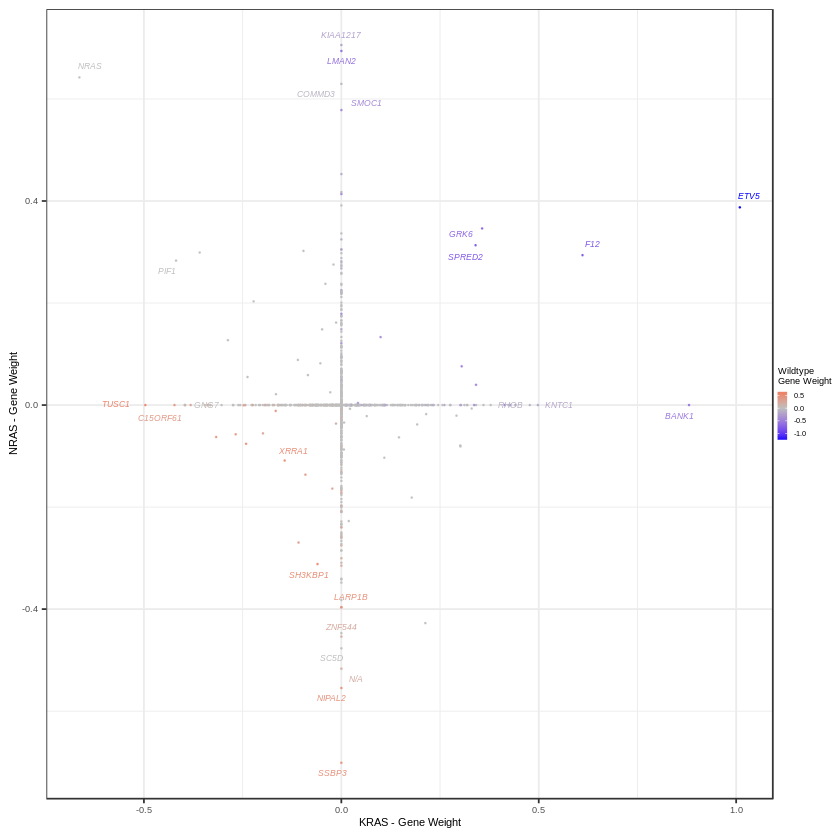

In [8]:
p

In [9]:
# Save Figure
fig_file <- file.path('figures', 'classifier_coefficients_scatter.pdf')
ggplot2::ggsave(fig_file, plot = p, dpi = 600, width = 4, height = 3)